In [1]:
import numpy as np
import os
from PIL import Image
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from timeit import default_timer as timer
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


import helperfunction as hf
import cnn_models as cnn

In [2]:
#Set GPU Allocation
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
      
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

## ACCESS IMAGES IN THE DIRECTORY

(4160, 3120, 3)


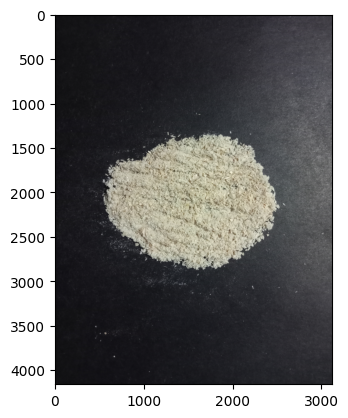

In [3]:
# Define the directory for images
partial_dir = 'C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Dataset Images\\Rice Bran\\Raw'

# Define the subdirectories for each fabric type
pure_dir = os.path.join(partial_dir, 'Pure')
adulterated_dir = os.path.join(partial_dir, 'Adulterated')

# display sample image
image_path = os.path.join(adulterated_dir, 'adulterated_rb (221).jpg')
img = mpimg.imread(image_path)
print(img.shape)
plt.imshow(img)
plt.show()


## Pre-process Images

In [6]:
# get images in each directory
def process_image(directory, output_path, img_index, class_name, kernel_num, limit_num):
    # Get a list of files in the directory, sorted by filename
    files = sorted(os.listdir(directory), key=lambda x: int(x.split('(')[1].split(')')[0]))

    for filename in files:
        if f'{class_name} ({img_index}).jpg' in filename and img_index <= limit_num:
            filepath = os.path.join(directory, filename)
            # print(filepath)
            # print(type(filepath))
            # print(type(filepath))
            
            if os.path.isfile(filepath):
                # Load the image
                img_samp = cv2.imread(filepath)

                if img_samp is not None:
                    # Extract RGB channels
                    r_channel = img_samp[:, :, 2]
                    g_channel = img_samp[:, :, 1]
                    b_channel = img_samp[:, :, 0]

                    # convert to gray image
                    gray_img = np.uint8((0.299 * r_channel)) + np.uint8((0.587 * g_channel)) + np.uint8((0.114 * b_channel))

                    # threshold image
                    thres_img = hf.segment_img(gray_img)

                    # Define a rectangular structuring element (kernel)
                    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_num, kernel_num))
                    
                    # Clean thresholded image
                    opened_img = cv2.morphologyEx(thres_img, cv2.MORPH_OPEN, kernel)

                    # Make the thresholded image into a 500 x 500 resolution
                    final_img = hf.extract_and_resize_foreground(img_samp, opened_img)

                    # Create the output folder if it doesn't exist
                    os.makedirs(output_path, exist_ok=True)

                    image_name = f'image ({img_index}).jpg'
                    img_index += 1
                    path = os.path.join(output_path, image_name)
                    cv2.imwrite(path, final_img)
                else:
                    print(f"Error: Unable to load {filename}")
# initialize kernel
default_kernel = 20

adulterated_output_folder_path = rf'C:\Users\hp\Documents\VSU Files\Fourth Year\Thesis\Dataset Images\Rice Bran\Processed\Adulterated'
pure_output_folder_path = rf'C:\Users\hp\Documents\VSU Files\Fourth Year\Thesis\Dataset Images\Rice Bran\Processed\Pure'

process_image(adulterated_dir, adulterated_output_folder_path, 241, 'adulterated_rb', default_kernel, 440)
process_image(pure_dir, pure_output_folder_path, 201, 'pure_rb', default_kernel, 420)

## For depicted image

In [15]:
# Saving image that don't need high kernel
# Adulterated
changed_kernel_1 = 3
process_image(adulterated_dir, adulterated_output_folder_path, 241, 'adulterated_rb', changed_kernel_1, 260)


# Pure
# changed_kernel_2 = 5
# process_image(pure_dir, pure_output_folder_path, 301, 'pure_rb', changed_kernel_2, 420)

## EXPERIMENT PART(IGNORE FOR NOW)

Text(0.5, 1.0, 'Clean Image')

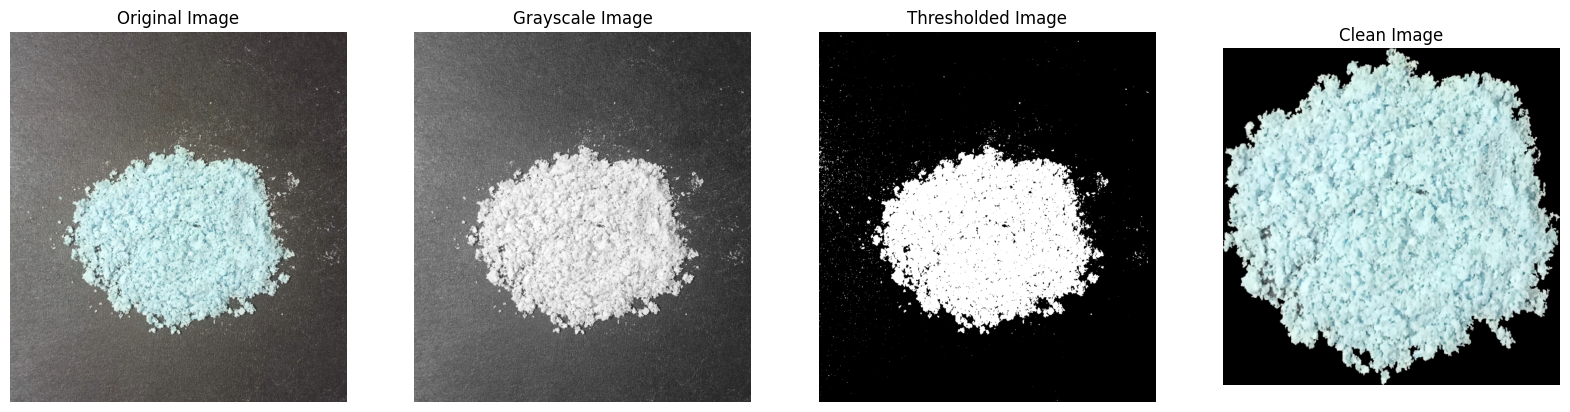

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 6))
img_samp = cv2.imread(rf"C:\Users\hp\Documents\VSU Files\Fourth Year\Thesis\Dataset Images\Rice Bran\Raw\Pure\pure_rb (21).jpg", cv2.COLOR_BGR2RGB)
#img_samp = cv2.imread(rf"C:\Users\hp\Documents\VSU Files\Fourth Year\Thesis\Program\Dataset Images\Rice Bran\Raw\Adulterated\adulterated_rb (125).jpg", cv2.COLOR_BGR2RGB)

# thres_img = hf.segment_img(img_samp)

# img_rgb = cv2.cvtColor(thres_img, cv2.COLOR_BGR2RGB)

# axes[0].imshow(thres_img)
# axes[0].set_title("Image")
# axes[0].axis('off')

# Extract RGB channels
r_channel = img_samp[:, :, 2]
g_channel = img_samp[:, :, 1]
b_channel = img_samp[:, :, 0]

gray_img = np.uint8((0.299 * r_channel)) + np.uint8((0.587 * g_channel)) + np.uint8((0.114 * b_channel))

# Display the image in the first subplot
axes[0].imshow(img_samp) 
axes[0].set_title("Original Image")
axes[0].axis('off')

# Display the grayscale image in the second subplot (if needed)
axes[1].imshow(gray_img, cmap='gray')
axes[1].set_title("Grayscale Image")
axes[1].axis('off')

# Display the thresholded image in the second subplot (if needed)
thres_img = hf.segment_img(gray_img)
axes[2].imshow(thres_img, cmap='gray')
axes[2].set_title("Thresholded Image")
axes[2].axis('off')


# Define a rectangular structuring element (kernel)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
opened_img = cv2.morphologyEx(thres_img, cv2.MORPH_OPEN, kernel)

final_img = hf.extract_and_resize_foreground(img_samp, opened_img)

axes[3].imshow(final_img)
axes[3].axis('off')
axes[3].set_title("Clean Image")



(4160, 3120, 3)


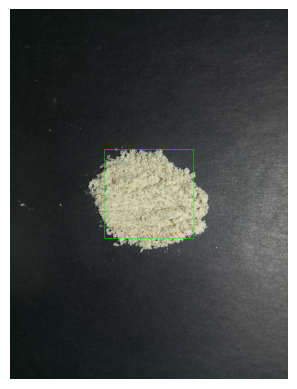

In [10]:
img_samp = cv2.imread(rf"C:\Users\hp\Documents\VSU Files\Fourth Year\Thesis\Program\Dataset Images\Rice Bran\Raw\Pure\pure_rb (4).jpg",)

# Convert BGR to RGB for Matplotlib display
img_rgb = cv2.cvtColor(img_samp, cv2.COLOR_BGR2RGB)

print(img_rgb.shape)

target_size = 1000
pos = 2

# Draw triangle in the image
cv2.rectangle(img_rgb, ((img_rgb.shape[1] - target_size) // pos, (img_rgb.shape[0] - target_size) // pos), ((img_rgb.shape[1] + target_size) // pos, (img_rgb.shape[0] + target_size) // pos), (0, 255, 0), 3)

# Display the image with aspect ratio preserved and no axes
plt.imshow(img_rgb)
plt.axis('off')
plt.show()


In [ ]:
# Define the base directory
#base_dir = 'C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Dataset Images\\Raw\\Rice Bran\\Training and Validation'
base_dir = 'C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Dataset Images\\Rice Bran\\Raw'

# Define the subdirectories for each fabric type
pure_rb_dir = os.path.join(base_dir, 'Pure')
adulterated_rb_dir = os.path.join(base_dir, 'Adulterated')

# image_path = os.path.join(pure_rb_dir, 'pure_rb_1 (11).jpg')
# img = mpimg.imread(image_path)
# print(img.shape)
# plt.imshow(img)
# plt.show()

image_path = os.path.join(adulterated_rb_dir, 'adulterated_rb (11).jpg')
img = mpimg.imread(image_path)
print(img.shape)
plt.imshow(img)
plt.show()

## DATA AUGMENTATION

In [ ]:
hf.img_augmentation(pure_rb_dir)
hf.img_augmentation(adulterated_rb_dir)

## DATA SPLITTING

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    label_mode='binary',
    image_size=(300, 300),
    batch_size=32,
)

validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    label_mode='binary',
    image_size=(300, 300),
    batch_size=32,
)

## TRAINING PROCESS WITH DIFFERENT TYPES OF CNN ARCHITECTURE

In [ ]:
# number of epochs
epoch = 10
start = timer()

# Custom CNN Model
custom_model = cnn.CustomModel()
# custom_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# # Define EarlyStopping callback(optional)
# cm_early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True)

# #custom_model_history = custom_model.fit(x = train_ds, validation_data=validation_ds, epochs=epoch)
# custom_model_history = custom_model.fit(x=train_ds, validation_data=validation_ds, epochs=epoch, callbacks=[cm_early_stopping])
# print('Total Time consumed for ' + str(epoch) + ' --->', timer()-start)

# ResNet50 Model
resnet_model = cnn.ResNetModel()
# resnet_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# # Define EarlyStopping callback(optional)
# rm_early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True)

# #resnet50_model_history = custom_model.fit(x = train_ds, validation_data=validation_ds, epochs=epoch)
# resnet_model_history = custom_model.fit(x=train_ds, validation_data=validation_ds, epochs=epoch, callbacks=[rm_early_stopping])
# print('Total Time consumed for ' + str(epoch) + ' --->', timer()-start)



## EVALUATING TRAINING MODEL

In [ ]:
fig_one = plt.gcf()

# Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4, ymax = 1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
# Model Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

## TESTING THE MODEL